# Anomaly Detection in ECG



## Project Canvas

### Background



An electrocardiogram (ECG) is a simple test that can be used to check your heart's rhythm and electrical activity. Sensors attached to the skin are used to detect the electrical signals produced by your heart each time it beats.

### Value Proposition



Predicting anomalies in an electrocardiogram (ECG) is crucial for several reasons, primarily related to healthcare and patient well-being. ECGs are a non-invasive way to measure the electrical activity of the heart and are widely used to detect various heart conditions. Here are some of the key reasons why predicting anomalies in an ECG is important:
1. Early detection of Heart Conditions
2. Preventing Heart Attacks and Strokes
3. Monitoring and Management of Heart Disease
4. Enhancing Remote Patient Monitoring
5. Personalized Medicine




### Objective

The objective of detecting anomalies in ECG signals consists of finding the irregular heart rates, heartbeats, and rhythms. To achieve this goal, an anomaly detection system must be able to find them on all heartbeat sequences; therefore, to obtain the essential metrics.

### Methodology and Approach

1. Perform some ***basic data analysis and exploratory analysis***.
2. Decide the ***models that will be used***.
3. Define which ***metrics will be used*** to judge model performance.
4. Perform ***model data pre-processing and prepration***.
5. ***Train and Validate models***.
6. Select the ***best model*** based on the metrics you have defined
7. Give the observations / feedback / recommendations

### Data Description



This dataset contains 5,000 Electrocardiograms, each with 140 data points. You will use a simplified version of the dataset, where each example has been labeled either 0 (corresponding to an abnormal rhythm), or 1 (corresponding to a normal rhythm).

### Selecting Models

**Autoencoders**

Autoencoder is an important application of Neural Networks or Deep Learning. It is widely used in dimensionality reduction, image compression, image denoising, and feature extraction. It is also applied in anomaly detection and has delivered superior results.

### Selecting Metrics

**Best Practice Metrics for Autoencoders**

Autoencoders are used for unsupervised learning tasks such as dimensionality reduction, feature learning, and anomaly detection. Evaluating their performance involves specific metrics depending on the task:

**Reconstruction Error**
- **Description**: Quantifies how well the autoencoder's output matches the original input. Commonly calculated using Mean Squared Error (MSE) or Mean Absolute Error (MAE).
- **Use Case**: General evaluation for tasks like dimensionality reduction or feature learning.

**Peak Signal-to-Noise Ratio (PSNR)**
- **Description**: Used in image processing to measure the quality of reconstructed images. It's defined via the mean squared error between the original and reconstructed images.
- **Use Case**: Image data autoencoders, assessing reconstruction quality from a perceptual perspective.

**Structural Similarity Index (SSIM)**
- **Description**: Measures similarity between two images considering luminance, contrast, and structure, offering a comprehensive view of image quality.
- **Use Case**: Image reconstruction tasks, providing nuanced evaluation of image quality.

***Latent Space Quality***
- **Description**: Evaluates how well the encoded representations in the latent space capture relevant information. Assessed through visual inspections (e.g., t-SNE) or performance on downstream tasks.
- **Use Case**: Feature learning, dimensionality reduction, pre-training for other tasks.

**Anomaly Detection Performance**
- **Description**: In anomaly detection, metrics like precision, recall, F1 score, or AUROC assess how effectively the autoencoder distinguishes between normal and anomalous instances.
- **Use Case**: Anomaly detection in images, time series, and tabular data.


We will use Reconstruction Error, and Anamoly Detection Performance

### Importing necessary libraries and data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Model

### Read in the dataset

In [5]:
# Read the dataset file
# Download the dataset
data = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = data.values

### Data Overview



In [6]:
# View the first 5 rows of the dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [7]:
# Understand the shape of the data
data.shape

(4998, 141)

In [9]:
#check for duplicate values
data.duplicated().sum()

0

In [21]:
target_counts = data[140].value_counts()
target_counts

140
1.0    2919
0.0    2079
Name: count, dtype: int64

**Observations**
- There are no duplicate records
- There are 4998 records
- There is a 60% / 40% split in the target data


## Exploratory Data Analysis (EDA)

In this case EDA will consist on plotting the raw ***NORMAL*** ECG's and ***ANAMOLOUS*** ECG's.

In [36]:
last_column = data.columns[-1]
normal_plot = data[data[last_column] == 1]
normal_plot = normal_plot.drop(last_column, axis=1)

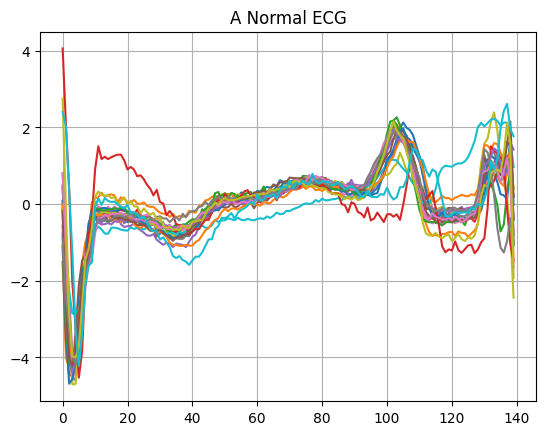

In [37]:
plt.grid()
for i in range(0,20,1):
    row = normal_plot.iloc[i].to_numpy()
    plt.plot(np.arange(140), row)
plt.title("A Normal ECG")
plt.show()

In [39]:
last_column = data.columns[-1]
anom_plot = data[data[last_column] == 0]
anom_plot = anom_plot.drop(last_column, axis=1)

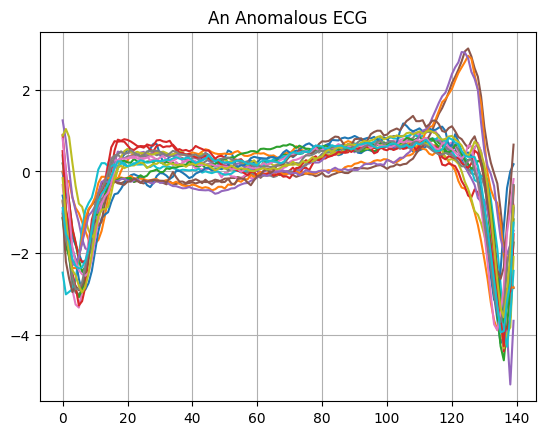

In [40]:
plt.grid()
for i in range(0,20,1):
    row = anom_plot.iloc[i].to_numpy()
    plt.plot(np.arange(140), row)
plt.title("An Anomalous ECG")
plt.show()

**Observations**
- By plotting the overlays of the Normal ECG's we can see a majority of the ECG's are very similiar.
- By plotting the overlays of the Anamolous ECG's we can see a majority of the ECG's have very similiar patterns.

## Feature Engineering / Data Preparation



In [42]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalize the data to [0,1].

In [44]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

We will Train the autoencoder using only the normal rhythms, which are labeled in this dataset as `1`. Separate the normal rhythms from the abnormal rhythms.

In [45]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Let's replot the ECG's to ensure normalization was performed correctly.

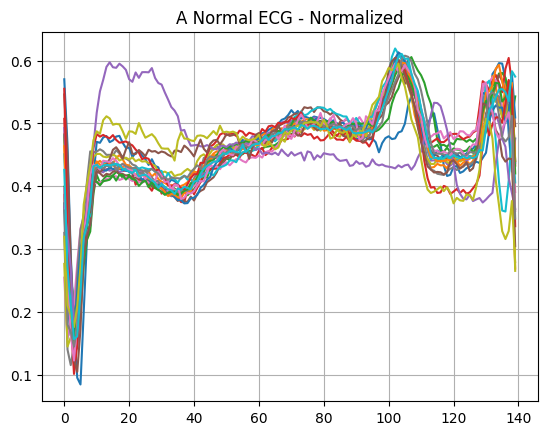

In [46]:
plt.grid()
for i in range(0,20,1):
    plt.plot(np.arange(140), normal_train_data[i])
plt.title("A Normal ECG - Normalized")
plt.show()

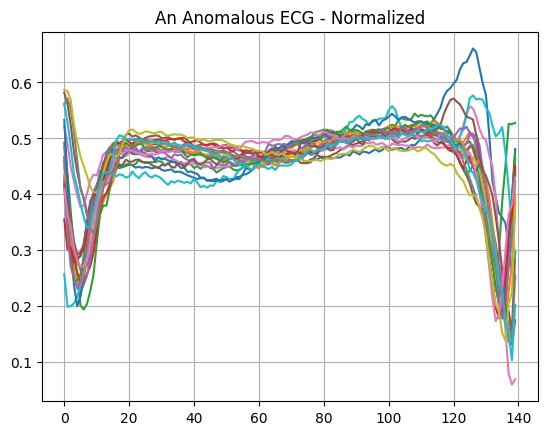

In [47]:
plt.grid()
for i in range(0,20,1):
    plt.plot(np.arange(140), anomalous_train_data[i])
plt.title("An Anomalous ECG - Normalized")
plt.show()

## Train and Validate the model

**Build the model**

In [49]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

**Complie the model**

In [50]:
autoencoder.compile(optimizer='adam', loss='mae')

**Train and Validate the model**

In [51]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20


2024-03-13 07:29:40.008754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0581 - val_loss: 0.0535
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0567 - val_loss: 0.0522
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0549 - val_loss: 0.0504
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0522 - val_loss: 0.0483
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0486 - val_loss: 0.0461
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0445 - val_loss: 0.0440
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0397 - val_loss: 0.0427
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0355 - val_loss: 0.0406
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0318 - val_loss: 0.0389
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0289 - val_loss: 0.0382
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0269 - val_loss: 0.0372
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0260 - val_loss: 0.0367
Epoch 13/20


**Plot the loss**

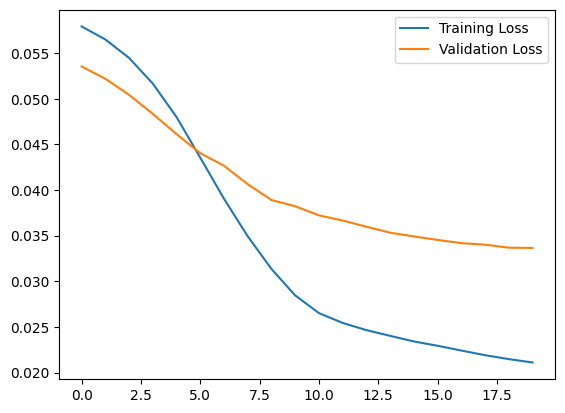

In [52]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

We will classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. First, let's plot a normal ECG from the training set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

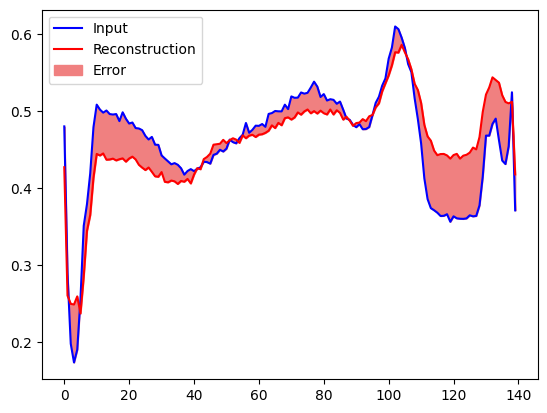

In [53]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Create a similar plot, this time for an anomalous test example.

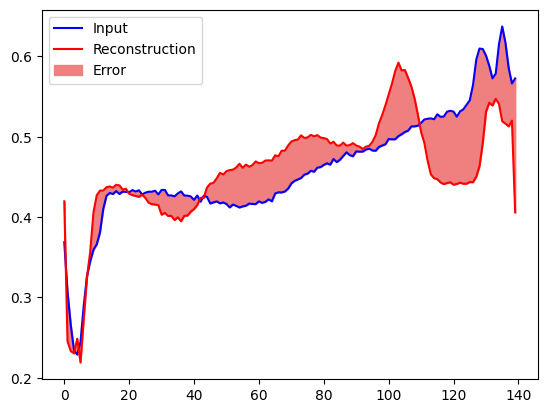

In [54]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold. In this tutorial, you will calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.

Plot the reconstruction error on normal ECGs from the training set

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


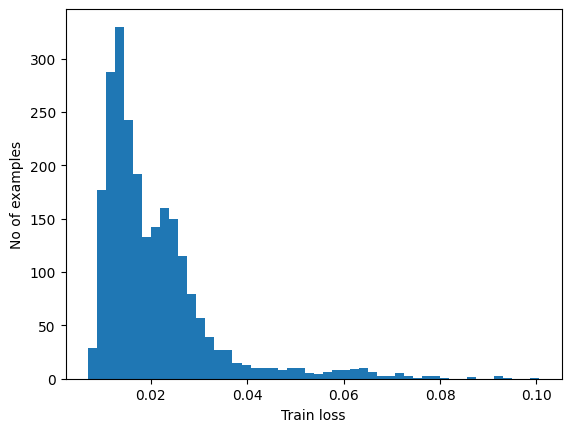

In [55]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Choose a threshold value that is one standard deviations above the mean.

In [56]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.032961085


Note: There are other strategies you could use to select a threshold value above which test examples should be classified as anomalous, the correct approach will depend on your dataset. You can learn more with the links at the end of this tutorial.

If you examine the reconstruction error for the anomalous examples in the test set, you'll notice most have greater reconstruction error than the threshold. By varing the threshold, you can adjust the precision and recall of your classifier.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


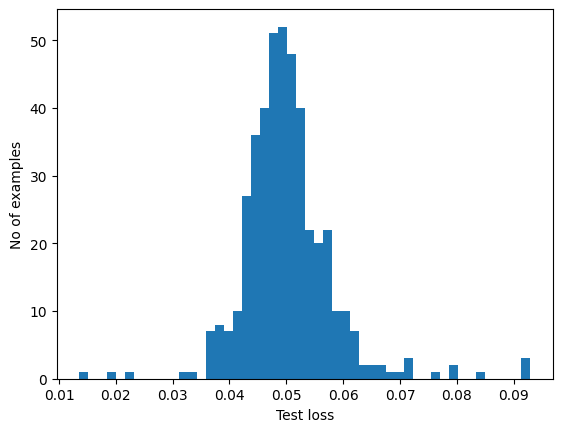

In [57]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [58]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [59]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.943
Precision = 0.9921722113502935
Recall = 0.9053571428571429


## Next Steps

- We can choose to further improve recall (this model still has about 10% error rate in False Negstives). Depending on the what the business decides to focus on, will be what you optimize on.
  